In [2]:
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [33]:
oil_price_path = '~/Downloads/crudeprice_1986Jan-2021Jan_weekly.xls'
co2_path = '~/Desktop/co2_weekly_mlo.csv'

oil_price = pd.read_excel(oil_price_path)
co2 = pd.read_csv(co2_path)

In [34]:
oil_price.head()

,Date,Weekly Price
0,2000-01-09,24.95
1,2000-01-16,26.27
2,2000-01-23,29.37
3,2000-01-30,28.34
4,2000-02-06,28.08


In [35]:
oil_price.tail()

,Date,Weekly Price
1094,2020-12-27,47.73
1095,2021-01-03,47.98
1096,2021-01-10,50.09
1097,2021-01-17,52.75
1098,2021-01-24,52.82


In [36]:
co2.head()

,date,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974/5/19,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974/5/26,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974/6/2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974/6/9,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974/6/16,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [37]:
co2.tail()

,date,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
2429,2020/12/6,2020,12,6,2020.9303,413.39,7,411.28,389.82,134.33
2430,2020/12/13,2020,12,13,2020.9495,413.92,7,411.74,389.35,134.58
2431,2020/12/20,2020,12,20,2020.9686,414.60,6,412.30,390.27,135.01
2432,2020/12/27,2020,12,27,2020.9877,415.09,7,412.80,390.00,135.25
2433,2021/1/3,2021,1,3,2021.0068,415.25,7,413.39,391.73,135.20


In [38]:
co2_start_index = co2[co2['date'] == '2000/1/9'].index.values[0]
co2_start_index

1338

In [39]:
co2_df = co2[co2_start_index:]
len(co2_df)

1096

In [40]:
len(oil_price)

1099

In [41]:
df_date = oil_price['Date'].reset_index(drop=True)
df_date

0      2000-01-09
1      2000-01-16
2      2000-01-23
3      2000-01-30
4      2000-02-06
          ...    
1094   2020-12-27
1095   2021-01-03
1096   2021-01-10
1097   2021-01-17
1098   2021-01-24
Name: Date, Length: 1099, dtype: datetime64[ns]

In [42]:
df_oil_price = oil_price['Weekly Price'].reset_index(drop=True)
df_oil_price

0       24.95
1       26.27
2       29.37
3       28.34
4       28.08
        ...  
1094    47.73
1095    47.98
1096    50.09
1097    52.75
1098    52.82
Name: Weekly Price, Length: 1099, dtype: float64

In [43]:
df_co2 = co2_df['average'].reset_index(drop=True)
df_co2

0       368.87
1       370.03
2       370.08
3       369.26
4       369.61
         ...  
1091    413.39
1092    413.92
1093    414.60
1094    415.09
1095    415.25
Name: average, Length: 1096, dtype: float64

In [44]:
df = pd.DataFrame({ 'Week': df_date, 'oil_price': df_oil_price, 'CO2_average': df_co2 })
df = df.dropna()
df

,Week,oil_price,CO2_average
0,2000-01-09,24.95,368.87
1,2000-01-16,26.27,370.03
2,2000-01-23,29.37,370.08
3,2000-01-30,28.34,369.26
4,2000-02-06,28.08,369.61
...,...,...,...
1091,2020-12-06,45.37,413.39
1092,2020-12-13,46.04,413.92
1093,2020-12-20,47.97,414.60
1094,2020-12-27,47.73,415.09


In [45]:
df = df[df.CO2_average >= 0]

In [46]:
df

,Week,oil_price,CO2_average
0,2000-01-09,24.95,368.87
1,2000-01-16,26.27,370.03
2,2000-01-23,29.37,370.08
3,2000-01-30,28.34,369.26
4,2000-02-06,28.08,369.61
...,...,...,...
1091,2020-12-06,45.37,413.39
1092,2020-12-13,46.04,413.92
1093,2020-12-20,47.97,414.60
1094,2020-12-27,47.73,415.09


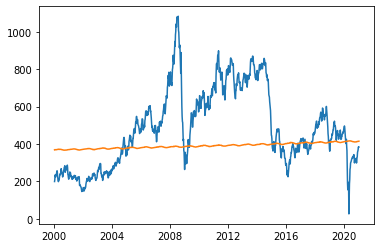

In [47]:
#df_test = df[1000:1090]
plt.plot(df['Week'], df['oil_price']*8) #the blue line
plt.plot(df['Week'], df['CO2_average']) #the orange line 
plt.show()
#df.plot()

In [48]:
periods = (1, 2, 3, 5, 10)

for p in periods:
    df['op_chg_{}'.format(p)] = df['oil_price'].pct_change(periods=p)

df['CO2_chg_1'] = df['CO2_average'].pct_change()

df = df[11:]  # The first 10 rows contains NaN
df

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Week,oil_price,CO2_average,op_chg_1,op_chg_2,op_chg_3,op_chg_5,op_chg_10,CO2_chg_1
11,2000-03-26,27.99,371.13,-0.105465,-0.129123,-0.099131,-0.062939,0.065474,0.000539
12,2000-04-02,26.92,371.06,-0.038228,-0.139661,-0.162414,-0.105648,-0.083418,-0.000189
13,2000-04-09,25.60,372.00,-0.049034,-0.085388,-0.181847,-0.176054,-0.096683,0.002533
14,2000-04-16,24.87,372.33,-0.028516,-0.076152,-0.111468,-0.226198,-0.114316,0.000887
15,2000-04-23,26.66,371.92,0.071974,0.041406,-0.009658,-0.147971,-0.075269,-0.001101
...,...,...,...,...,...,...,...,...,...
1091,2020-12-06,45.37,413.39,0.021847,0.092726,0.115839,0.215702,0.140523,-0.000894
1092,2020-12-13,46.04,413.92,0.014767,0.036937,0.108863,0.220896,0.180816,0.001282
1093,2020-12-20,47.97,414.60,0.041920,0.057307,0.080405,0.179784,0.193580,0.001643
1094,2020-12-27,47.73,415.09,-0.005003,0.036707,0.052017,0.149566,0.183486,0.001182


In [49]:
chgs = ['op_chg_{}'.format(i) for i in periods]
X = df[['oil_price'] + chgs].values
X

array([[ 2.79900000e+01, -1.05465005e-01, -1.29122589e-01,
        -9.91309945e-02, -6.29394041e-02,  6.54739246e-02],
       [ 2.69200000e+01, -3.82279385e-02, -1.39661234e-01,
        -1.62414437e-01, -1.05647841e-01, -8.34184542e-02],
       [ 2.56000000e+01, -4.90341753e-02, -8.53876384e-02,
        -1.81847236e-01, -1.76054071e-01, -9.66831334e-02],
       ...,
       [ 4.79700000e+01,  4.19200695e-02,  5.73065903e-02,
         8.04054054e-02,  1.79783571e-01,  1.93580493e-01],
       [ 4.77300000e+01, -5.00312695e-03,  3.67072111e-02,
         5.20167512e-02,  1.49566474e-01,  1.83486239e-01],
       [ 4.79800000e+01,  5.23779594e-03,  2.08463623e-04,
         4.21372719e-02,  8.06306306e-02,  1.86742518e-01]])

In [50]:
y = (df['CO2_chg_1'] > 0).values.astype('int')
y

array([1, 0, 1, ..., 1, 1, 1])

In [51]:
X.shape

(1081, 6)

In [52]:
y.shape

(1081,)

In [53]:
########

# Create training, validation, and test set

training_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, \
  test_size=validation_ratio/(training_ratio+validation_ratio), random_state=42)

print("X_train shape:\t", X_train.shape)
print("X_test shape:\t", X_test.shape)
print("X_val shape:\t", X_val.shape)
print("y_train shape:\t", y_train.shape)
print("y_val shape:\t", y_val.shape)
print("y_test shape:\t", y_test.shape)

X_train shape:	 (756, 6)
X_test shape:	 (163, 6)
X_val shape:	 (162, 6)
y_train shape:	 (756,)
y_val shape:	 (162,)
y_test shape:	 (163,)


In [54]:
X_train[:5,:]

array([[ 8.76300000e+01, -4.16666667e-02, -5.92592593e-02,
        -6.29811805e-02, -6.83606209e-02, -1.42479695e-01],
       [ 4.61700000e+01, -4.15196180e-02, -5.21453500e-02,
        -3.59156400e-02, -5.77551020e-02,  4.22121896e-02],
       [ 3.98500000e+01,  1.60632330e-02,  3.91134289e-02,
         5.22841299e-02,  1.65545481e-01,  1.10030120e+01],
       [ 1.84500000e+01, -5.23882897e-02, -3.55462624e-02,
         9.29978118e-03, -1.08695652e-01, -1.83628319e-01],
       [ 2.67500000e+01,  3.08285164e-02,  3.37584396e-03,
         7.55930840e-02, -6.31500743e-03, -1.11295681e-01]])

In [55]:
X_test[:5,:]

array([[ 1.23010000e+02,  6.57598337e-02,  3.77963385e-02,
         7.59205808e-02,  1.88961918e-01,  2.19853233e-01],
       [ 8.11500000e+01, -1.22930867e-02, -1.38534451e-02,
         3.49445224e-02,  7.31288019e-02,  3.81220417e-02],
       [ 1.02110000e+02, -1.77008177e-02, -5.93847352e-03,
         1.64244475e-02,  2.34539441e-02,  1.89601836e-02],
       [ 9.78300000e+01, -1.83654729e-03,  1.14764268e-02,
         7.31054366e-03,  5.53398058e-02, -1.63281968e-03],
       [ 3.83500000e+01,  1.26749406e-02,  2.75991426e-02,
         1.21673004e-01,  4.52651515e-01,  5.71077427e-01]])

In [56]:
# The first column of X is 'oil_price'
# Normalize all columns for training and test set
# Note: Test set should use the mean and std of training set to keep consistent
for i in range(X_train.shape[1]):
    X_train_of_mean = X_train[:,i].mean()
    X_train_of_std = X_train[:,i].std()

  #### VALIDATION SET NORMALIZE
  
    X_train[:,i] = (X_train[:,i] - X_train_of_mean) / X_train_of_std
    X_test[:,i] = (X_test[:,i] - X_train_of_mean) / X_train_of_std

In [57]:
X_train

array([[ 1.01413436e+00, -3.29059402e-01, -2.99288989e-01,
        -7.71474918e-01, -6.81007083e-01, -4.14847211e-01],
       [-5.91944192e-01, -3.28055457e-01, -2.68711270e-01,
        -4.60477636e-01, -5.87835491e-01,  8.95118590e-03],
       [-8.36768515e-01,  6.50799311e-02,  1.23546374e-01,
         5.52984068e-01,  1.37390454e+00,  2.51598636e+01],
       ...,
       [-4.68369889e-01, -2.06628920e-01, -1.24062253e-01,
        -7.56551378e-02,  8.59348209e-01,  1.91336101e-02],
       [-6.31069598e-01, -2.73967149e-01,  4.22929911e-01,
         1.01398764e+00, -3.74382305e-02, -5.93424412e-01],
       [ 1.57816001e+00, -1.85910738e-01, -5.21327129e-02,
        -1.65753744e-01, -4.50989955e-01, -1.23936079e-01]])

In [58]:
X_test

array([[ 2.38468571e+00,  4.04373523e-01,  1.17885123e-01,
         8.24579309e-01,  1.57962259e+00,  4.16570555e-01],
       [ 7.63111950e-01, -1.28517165e-01, -1.04121161e-01,
         3.53742866e-01,  5.62005633e-01, -4.34164929e-04],
       [ 1.57506097e+00, -1.65437366e-01, -7.01002355e-02,
         1.40937474e-01,  1.25602128e-01, -4.44034209e-02],
       [ 1.40926222e+00, -5.71272357e-02,  4.75423709e-03,
         3.62139292e-02,  4.05725764e-01, -9.16566168e-02],
       [-8.94875553e-01,  4.19470426e-02,  7.40545123e-02,
         1.35029869e+00,  3.89618814e+00,  1.22249796e+00],
       [ 1.43754098e+00,  8.46610475e-03, -7.87536273e-02,
        -2.07586262e-01, -4.09064554e-01, -1.18915236e-01],
       [ 9.10072030e-02, -7.65416179e-02,  5.46802797e-02,
         7.84690758e-01,  8.29835506e-01,  3.52325222e-01],
       [ 5.61429798e-02, -2.93500549e-01, -1.05209224e-01,
        -2.62899300e-01,  4.23127067e-01,  1.61206811e-01],
       [-9.19667890e-01,  2.67578038e-02, -3.337

In [59]:
res = dict()
score = dict()

### SVC

# Try different kernels
kernels = ('linear', 'poly', 'rbf')

for k in kernels:
    svm_clf = SVC(kernel=k).fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    score_svc = accuracy_score(y_test, y_pred)
    print(f"kernel={k},\tscore={score_svc:.4f}")

    score[f'svc_{k}'] = score_svc

kernel=linear,	score=0.5521
kernel=poly,	score=0.5951
kernel=rbf,	score=0.5337


In [60]:
# Gaussian Naive Bayes
gnb_clf = GaussianNB().fit(X_train, y_train)
y_pred = gnb_clf.predict(X_test)
score_gnb = accuracy_score(y_test, y_pred)
print(f"GNB, score={score_gnb:.4f}")

score['gnb'] = score_gnb

GNB, score=0.6135


In [61]:
### Neuro Networks

model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_dim=6, activation='relu'))
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
24/24 [==============================] - 2s 22ms/step - loss: 0.6909 - accuracy: 0.5191 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6877 - accuracy: 0.5482 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.5309 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 4/50
24/24 [==============================] - 0s 20ms/step - loss: 0.6894 - accuracy: 0.5260 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 5/50
24/24 [==============================] - 0s 6ms/step - loss: 0.6858 - accuracy: 0.5259 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6886 - accuracy: 0.5305 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.5344 - val_loss: 0.6934 - val_accuracy: 0.4938
Epoch 8/50
24/24 [

In [62]:
loss, score_neuro = model.evaluate(X_test, y_test)

score['neuro'] = score_neuro
res[0] = score

6/6 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5276


In [64]:
### Modify LAGS

lags = [i for i in range(1, 6)]

for lag in lags:
    CO2_chg_1_lag = df['CO2_chg_1'][lag:].values.tolist()
    CO2_chg_1_lag.extend([np.nan for _ in range(lag)])
    CO2_chg_1_lag = np.array(CO2_chg_1_lag)
    df[f'CO2_chg_1_lag_{lag}'] = CO2_chg_1_lag

df

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Week,oil_price,CO2_average,op_chg_1,op_chg_2,op_chg_3,op_chg_5,op_chg_10,CO2_chg_1,CO2_chg_1_lag_1,CO2_chg_1_lag_2,CO2_chg_1_lag_3,CO2_chg_1_lag_4,CO2_chg_1_lag_5
11,2000-03-26,27.99,371.13,-0.105465,-0.129123,-0.099131,-0.062939,0.065474,0.000539,-0.000189,0.002533,0.000887,-0.001101,-0.002716
12,2000-04-02,26.92,371.06,-0.038228,-0.139661,-0.162414,-0.105648,-0.083418,-0.000189,0.002533,0.000887,-0.001101,-0.002716,0.002615
13,2000-04-09,25.60,372.00,-0.049034,-0.085388,-0.181847,-0.176054,-0.096683,0.002533,0.000887,-0.001101,-0.002716,0.002615,-0.001022
14,2000-04-16,24.87,372.33,-0.028516,-0.076152,-0.111468,-0.226198,-0.114316,0.000887,-0.001101,-0.002716,0.002615,-0.001022,0.001561
15,2000-04-23,26.66,371.92,0.071974,0.041406,-0.009658,-0.147971,-0.075269,-0.001101,-0.002716,0.002615,-0.001022,0.001561,-0.000564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2020-12-06,45.37,413.39,0.021847,0.092726,0.115839,0.215702,0.140523,-0.000894,0.001282,0.001643,0.001182,0.000385,NaN
1092,2020-12-13,46.04,413.92,0.014767,0.036937,0.108863,0.220896,0.180816,0.001282,0.001643,0.001182,0.000385,NaN,NaN
1093,2020-12-20,47.97,414.60,0.041920,0.057307,0.080405,0.179784,0.193580,0.001643,0.001182,0.000385,NaN,NaN,NaN
1094,2020-12-27,47.73,415.09,-0.005003,0.036707,0.052017,0.149566,0.183486,0.001182,0.000385,NaN,NaN,NaN,NaN


In [65]:
df.tail(10)

,Week,oil_price,CO2_average,op_chg_1,op_chg_2,op_chg_3,op_chg_5,op_chg_10,CO2_chg_1,CO2_chg_1_lag_1,CO2_chg_1_lag_2,CO2_chg_1_lag_3,CO2_chg_1_lag_4,CO2_chg_1_lag_5
1086,2020-11-01,37.32,411.76,-0.076923,-0.074634,-0.071411,-0.061840,-0.126609,0.000680,0.002404,-0.000533,0.003176,-0.000193,-0.000894
1087,2020-11-08,37.71,412.75,0.010450,-0.067277,-0.064964,-0.032829,-0.121593,0.002404,-0.000533,0.003176,-0.000193,-0.000894,0.001282
1088,2020-11-15,40.66,412.53,0.078229,0.089496,0.005689,0.011694,-0.028203,-0.000533,0.003176,-0.000193,-0.000894,0.001282,0.001643
1089,2020-11-22,41.52,413.84,0.021151,0.101034,0.112540,0.029507,0.110754,0.003176,-0.000193,-0.000894,0.001282,0.001643,0.001182
1090,2020-11-29,44.40,413.76,0.069364,0.091982,0.177407,0.098194,0.122630,-0.000193,-0.000894,0.001282,0.001643,0.001182,0.000385
1091,2020-12-06,45.37,413.39,0.021847,0.092726,0.115839,0.215702,0.140523,-0.000894,0.001282,0.001643,0.001182,0.000385,NaN
1092,2020-12-13,46.04,413.92,0.014767,0.036937,0.108863,0.220896,0.180816,0.001282,0.001643,0.001182,0.000385,NaN,NaN
1093,2020-12-20,47.97,414.60,0.041920,0.057307,0.080405,0.179784,0.193580,0.001643,0.001182,0.000385,NaN,NaN,NaN
1094,2020-12-27,47.73,415.09,-0.005003,0.036707,0.052017,0.149566,0.183486,0.001182,0.000385,NaN,NaN,NaN,NaN
1095,2021-01-03,47.98,415.25,0.005238,0.000208,0.042137,0.080631,0.186743,0.000385,NaN,NaN,NaN,NaN,NaN


In [68]:
# Try different models

# res = { 1: dict(...), 2: dict(...) }
# dict(...) = { 'svm': 0.72.., 'gnb': ... }

for lag in lags:
    print(f"{'>'*20} LAG = {lag} {'<'*20}")
    print()

      # Remove the last few rows that contain NaN
    df_filtered = df[:-lag]
    score = dict()

      # Create X and y
    chgs = ['op_chg_{}'.format(i) for i in periods]
    X = df[['oil_price'] + chgs].values
    y = (df[f'CO2_chg_1_lag_{lag}'] > 0).values.astype('int')

    training_ratio = 0.7
    validation_ratio = 0.15
    test_ratio = 0.15

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, \
    test_size=validation_ratio/(training_ratio+validation_ratio), random_state=42)

      # Normalize
    for i in range(X_train.shape[1]):
        X_train_of_mean = X_train[:,i].mean()
        X_train_of_std = X_train[:,i].std()

        X_train[:,i] = (X_train[:,i] - X_train_of_mean) / X_train_of_std
        X_test[:,i] = (X_test[:,i] - X_train_of_mean) / X_train_of_std

      # SVC
    kernels = ['linear', 'poly', 'rbf']

    for k in kernels:
        svm_clf = SVC(kernel=k).fit(X_train, y_train)
        y_pred = svm_clf.predict(X_test)
        score_svc = accuracy_score(y_test, y_pred)

        # Store the result
        score[f'svc_{k}'] = score_svc

      # Gaussian Naive Bayes
    gnb_clf = GaussianNB().fit(X_train, y_train)
    y_pred = gnb_clf.predict(X_test)
    score_gnb = accuracy_score(y_test, y_pred)

      # Store the result
    score['gnb'] = score_gnb

      ### Neuro Networks

    model = keras.models.Sequential()
    model.add(keras.layers.Dense(10, input_dim=6, activation='relu'))
    model.add(keras.layers.Dense(5, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
    loss, score_neuro = model.evaluate(X_test, y_test)

    # Store the result
    score['neuro'] = score_neuro

    res[lag] = score

>>>>>>>>>>>>>>>>>>>> LAG = 1 <<<<<<<<<<<<<<<<<<<<

Epoch 1/50
24/24 [==============================] - 1s 17ms/step - loss: 0.7669 - accuracy: 0.4967 - val_loss: 5.3463 - val_accuracy: 0.4753
Epoch 2/50
24/24 [==============================] - 0s 10ms/step - loss: 0.7345 - accuracy: 0.4825 - val_loss: 4.7233 - val_accuracy: 0.4753
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7200 - accuracy: 0.4586 - val_loss: 4.1529 - val_accuracy: 0.4753
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7044 - accuracy: 0.5193 - val_loss: 3.7364 - val_accuracy: 0.4753
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6961 - accuracy: 0.4942 - val_loss: 3.2860 - val_accuracy: 0.4753
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6952 - accuracy: 0.4938 - val_loss: 2.8499 - val_accuracy: 0.4753
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6953 - accuracy: 0.5134 - val_los

Epoch 8/50
24/24 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5136 - val_loss: 2.3553 - val_accuracy: 0.5370
Epoch 9/50
24/24 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.4908 - val_loss: 2.2639 - val_accuracy: 0.5370
Epoch 10/50
24/24 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5223 - val_loss: 2.2526 - val_accuracy: 0.5370
Epoch 11/50
24/24 [==============================] - 0s 12ms/step - loss: 0.6853 - accuracy: 0.5516 - val_loss: 2.3401 - val_accuracy: 0.5370
Epoch 12/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6959 - accuracy: 0.5372 - val_loss: 2.2383 - val_accuracy: 0.5370
Epoch 13/50
24/24 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.5287 - val_loss: 2.3195 - val_accuracy: 0.5370
Epoch 14/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5313 - val_loss: 2.1907 - val_accuracy: 0.5370
Epoch 15/50
24

24/24 [==============================] - 0s 6ms/step - loss: 0.6805 - accuracy: 0.5462 - val_loss: 4.6852 - val_accuracy: 0.5309
Epoch 23/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.5636 - val_loss: 4.7142 - val_accuracy: 0.5309
Epoch 24/50
24/24 [==============================] - 0s 6ms/step - loss: 0.6840 - accuracy: 0.5386 - val_loss: 4.7193 - val_accuracy: 0.5309
Epoch 25/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6888 - accuracy: 0.5277 - val_loss: 4.9210 - val_accuracy: 0.5309
Epoch 26/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6822 - accuracy: 0.5510 - val_loss: 4.9212 - val_accuracy: 0.5309
Epoch 27/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.5402 - val_loss: 5.0757 - val_accuracy: 0.5309
Epoch 28/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6828 - accuracy: 0.5524 - val_loss: 5.3182 - val_accuracy: 0.5309
Epoch 29/50
24/24 [======

In [69]:
# Clean up the data
import heapq
ranking = []

for lag, dct in res.items():
    for m, s in dct.items():
        heapq.heappush(ranking, (-s, lag, m))

print("Accuracy ranking: (Descending)")
for r in ranking:
    s, l, m = r
    print(f"\tscore={-s:.6f}, lag={l}, model={m}")

Accuracy ranking: (Descending)
	score=0.613497, lag=0, model=gnb
	score=0.595092, lag=0, model=svc_poly
	score=0.582822, lag=5, model=svc_linear
	score=0.552147, lag=0, model=svc_linear
	score=0.564417, lag=1, model=neuro
	score=0.564417, lag=2, model=svc_poly
	score=0.576687, lag=5, model=neuro
	score=0.552147, lag=3, model=svc_linear
	score=0.527607, lag=1, model=gnb
	score=0.552147, lag=4, model=svc_linear
	score=0.558282, lag=4, model=svc_poly
	score=0.533742, lag=0, model=svc_rbf
	score=0.539877, lag=4, model=gnb
	score=0.552147, lag=5, model=gnb
	score=0.564417, lag=5, model=svc_rbf
	score=0.503067, lag=1, model=svc_rbf
	score=0.533742, lag=3, model=svc_poly
	score=0.527607, lag=3, model=svc_rbf
	score=0.515337, lag=3, model=gnb
	score=0.496933, lag=3, model=neuro
	score=0.527607, lag=0, model=neuro
	score=0.484663, lag=2, model=svc_linear
	score=0.539877, lag=4, model=svc_rbf
	score=0.527607, lag=1, model=svc_linear
	score=0.490798, lag=4, model=neuro
	score=0.490798, lag=2, mod

In [70]:
lag_dct = dict()
for s, l, m in ranking:
    if m not in lag_dct:
        lag_dct[m] = (l, -s)
        continue
    l_cur, s_cur = lag_dct[m]
    if s_cur < -s:
        lag_dct[m] = (l, -s)

lag_dct  # As you can see, for any model, lag=1 produces the best result

{'gnb': (0, 0.6134969325153374),
 'svc_poly': (0, 0.5950920245398773),
 'svc_linear': (5, 0.5828220858895705),
 'neuro': (5, 0.5766870975494385),
 'svc_rbf': (5, 0.5644171779141104)}